### Using network science to predict behaviour of a worm based on its brain network 

** WORK IN PROGRESS **

Attempting to reproduce parts of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5710776/

more:

http://barabasi.com/f/919.pdf
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1995545/

data for the experiment (video): https://figshare.com/s/72716a92be1ab0f1e1d4

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import networkx as nx
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [32]:
data_dir = Path.cwd() / 'data'
print(data_dir.exists())

data_fn = data_dir / 'NeuronConnect_wormatlas.xls'
print(data_fn.exists())

True
True


In [33]:
data = pd.read_excel(data_fn)

In [34]:
data.drop(['Type'], axis=1, inplace=True) # drop connection type

In [35]:
data.loc[:,'Nbr'] = np.ones(shape=(data.shape[0]),) # set all repeated synapses to 1

In [36]:
test = data.head()

In [37]:
data.shape[0]

6417

In [38]:
test

,Neuron 1,Neuron 2,Nbr
0,ADAR,ADAL,1.0
1,ADFL,ADAL,1.0
2,ASHL,ADAL,1.0
3,AVDR,ADAL,1.0
4,PVQL,ADAL,1.0


In [39]:
H = nx.from_pandas_edgelist(test, 'Neuron 1', 'Neuron 2', ['Nbr'] )

In [40]:
gen = H.neighbors('ADAL')
list(gen)

['ADAR', 'ADFL', 'ASHL', 'AVDR', 'PVQL']

In [41]:
G = nx.from_pandas_edgelist(data, 'Neuron 1', 'Neuron 2', ['Nbr'])

In [42]:
G.number_of_nodes()

283

In [44]:
node_degrees[rank]

array([115,  93,  92,  75,  74,  56,  55,  55,  54,  53,  50,  44,  40,
        39,  36,  36,  34,  34,  34,  33,  33,  32,  32,  31,  30,  30,
        29,  29,  29,  28,  28,  28,  27,  27,  25,  25,  25,  25,  25,
        25,  25,  25,  24,  24,  24,  24,  24,  24,  24,  24,  24,  23,
        23,  23,  23,  23,  22,  22,  22,  22,  22,  22,  22,  22,  21,
        21,  21,  21,  21,  21,  21,  21,  20,  20,  20,  20,  20,  19,
        19,  19,  19,  19,  19,  19,  19,  18,  18,  18,  18,  18,  18,
        17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  17,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  14,
        14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  13,
        13,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,
        13,  13,  13,  13,  13,  13,  13,  13,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  11,  11,  1

In [45]:
G['NMJ']

AtlasView({'AS02': {'Nbr': 1.0}, 'AS03': {'Nbr': 1.0}, 'AS04': {'Nbr': 1.0}, 'AS05': {'Nbr': 1.0}, 'AS06': {'Nbr': 1.0}, 'AS09': {'Nbr': 1.0}, 'AS11': {'Nbr': 1.0}, 'AVFL': {'Nbr': 1.0}, 'AVFR': {'Nbr': 1.0}, 'AVKR': {'Nbr': 1.0}, 'AVL': {'Nbr': 1.0}, 'DA01': {'Nbr': 1.0}, 'DA02': {'Nbr': 1.0}, 'DA03': {'Nbr': 1.0}, 'DA04': {'Nbr': 1.0}, 'DA05': {'Nbr': 1.0}, 'DA06': {'Nbr': 1.0}, 'VC01': {'Nbr': 1.0}, 'VC03': {'Nbr': 1.0}, 'AS01': {'Nbr': 1.0}, 'DA09': {'Nbr': 1.0}, 'DB01': {'Nbr': 1.0}, 'DB02': {'Nbr': 1.0}, 'DB03': {'Nbr': 1.0}, 'DB04': {'Nbr': 1.0}, 'DD01': {'Nbr': 1.0}, 'DD02': {'Nbr': 1.0}, 'DD03': {'Nbr': 1.0}, 'DD05': {'Nbr': 1.0}, 'DD06': {'Nbr': 1.0}, 'DVB': {'Nbr': 1.0}, 'HSNL': {'Nbr': 1.0}, 'HSNR': {'Nbr': 1.0}, 'IL1DL': {'Nbr': 1.0}, 'IL1DR': {'Nbr': 1.0}, 'IL1L': {'Nbr': 1.0}, 'IL1R': {'Nbr': 1.0}, 'IL1VL': {'Nbr': 1.0}, 'IL1VR': {'Nbr': 1.0}, 'PDA': {'Nbr': 1.0}, 'PDB': {'Nbr': 1.0}, 'PLNL': {'Nbr': 1.0}, 'PVNL': {'Nbr': 1.0}, 'PVNR': {'Nbr': 1.0}, 'RID': {'Nbr': 1.0}, 

In [46]:
# remove node neuromuscular junction
G.remove_node("NMJ")
print(G.number_of_nodes())

282


In [56]:
G.has_node('PDB')

True

In [57]:
list(G.neighbors('PDB'))

['AS11', 'RID', 'VD13']

In [58]:
node_degrees = np.array([e for v,e in list(G.degree())])
rank = np.argsort(node_degrees)[::-1]

In [77]:
sorted(G.degree(), key = lambda x: x[1], reverse=True)

[('AVAR', 93),
 ('AVAL', 92),
 ('AVBL', 75),
 ('AVBR', 74),
 ('AVER', 56),
 ('AVDR', 55),
 ('AVEL', 55),
 ('PVCL', 54),
 ('PVCR', 53),
 ('DVA', 50),
 ('AVDL', 44),
 ('RIBL', 40),
 ('AIBR', 39),
 ('RIAR', 36),
 ('RIBR', 36),
 ('AIBL', 34),
 ('AVKL', 34),
 ('RIAL', 33),
 ('RIGL', 33),
 ('HSNR', 33),
 ('RIH', 32),
 ('AVJL', 31),
 ('RIMR', 31),
 ('PVR', 30),
 ('ADEL', 29),
 ('AVJR', 29),
 ('RIML', 29),
 ('RMGL', 28),
 ('PVT', 28),
 ('RIS', 28),
 ('AVL', 27),
 ('DVC', 27),
 ('PVNR', 26),
 ('ADAL', 25),
 ('RICL', 25),
 ('RIGR', 25),
 ('PVPR', 25),
 ('RICR', 24),
 ('PVQR', 24),
 ('ADER', 24),
 ('AVKR', 24),
 ('CEPDR', 24),
 ('AIZL', 24),
 ('AIZR', 24),
 ('AVHL', 24),
 ('HSNL', 24),
 ('PVNL', 24),
 ('RMDVR', 24),
 ('PVPL', 23),
 ('RMGR', 23),
 ('RMDL', 23),
 ('ADAR', 22),
 ('ASHR', 22),
 ('RMDR', 22),
 ('RIR', 22),
 ('AVHR', 22),
 ('SMDDR', 22),
 ('AVFL', 22),
 ('AVG', 22),
 ('VC03', 22),
 ('AIAL', 21),
 ('OLLR', 21),
 ('ADLL', 21),
 ('RMDDL', 21),
 ('AQR', 21),
 ('DD01', 21),
 ('VA12', 21),
 

In [72]:
sorted(G.degree())

[('ADAL', 25),
 ('ADAR', 22),
 ('ADEL', 29),
 ('ADER', 24),
 ('ADFL', 10),
 ('ADFR', 18),
 ('ADLL', 21),
 ('ADLR', 17),
 ('AFDL', 6),
 ('AFDR', 8),
 ('AIAL', 21),
 ('AIAR', 17),
 ('AIBL', 34),
 ('AIBR', 39),
 ('AIML', 17),
 ('AIMR', 13),
 ('AINL', 9),
 ('AINR', 13),
 ('AIYL', 15),
 ('AIYR', 14),
 ('AIZL', 24),
 ('AIZR', 24),
 ('ALA', 8),
 ('ALML', 14),
 ('ALMR', 7),
 ('ALNL', 5),
 ('ALNR', 8),
 ('AQR', 21),
 ('AS01', 12),
 ('AS02', 10),
 ('AS03', 12),
 ('AS04', 9),
 ('AS05', 12),
 ('AS06', 9),
 ('AS07', 4),
 ('AS08', 2),
 ('AS09', 4),
 ('AS10', 6),
 ('AS11', 7),
 ('ASEL', 15),
 ('ASER', 16),
 ('ASGL', 7),
 ('ASGR', 9),
 ('ASHL', 20),
 ('ASHR', 22),
 ('ASIL', 10),
 ('ASIR', 8),
 ('ASJL', 6),
 ('ASJR', 6),
 ('ASKL', 12),
 ('ASKR', 10),
 ('AUAL', 13),
 ('AUAR', 14),
 ('AVAL', 92),
 ('AVAR', 93),
 ('AVBL', 75),
 ('AVBR', 74),
 ('AVDL', 44),
 ('AVDR', 55),
 ('AVEL', 55),
 ('AVER', 56),
 ('AVFL', 22),
 ('AVFR', 19),
 ('AVG', 22),
 ('AVHL', 24),
 ('AVHR', 22),
 ('AVJL', 31),
 ('AVJR', 29),
 (

In [59]:
np.array(G.degree())[rank]

array([['AVAR', '93'],
       ['AVAL', '92'],
       ['AVBL', '75'],
       ['AVBR', '74'],
       ['AVER', '56'],
       ['AVEL', '55'],
       ['AVDR', '55'],
       ['PVCL', '54'],
       ['PVCR', '53'],
       ['DVA', '50'],
       ['AVDL', '44'],
       ['RIBL', '40'],
       ['AIBR', '39'],
       ['RIBR', '36'],
       ['RIAR', '36'],
       ['AIBL', '34'],
       ['AVKL', '34'],
       ['HSNR', '33'],
       ['RIGL', '33'],
       ['RIAL', '33'],
       ['RIH', '32'],
       ['AVJL', '31'],
       ['RIMR', '31'],
       ['PVR', '30'],
       ['AVJR', '29'],
       ['RIML', '29'],
       ['ADEL', '29'],
       ['RIS', '28'],
       ['RMGL', '28'],
       ['PVT', '28'],
       ['AVL', '27'],
       ['DVC', '27'],
       ['PVNR', '26'],
       ['PVPR', '25'],
       ['RIGR', '25'],
       ['RICL', '25'],
       ['ADAL', '25'],
       ['AIZR', '24'],
       ['AVHL', '24'],
       ['AIZL', '24'],
       ['RMDVR', '24'],
       ['CEPDR', '24'],
       ['HSNL', '24'],
       ['AVKR', 

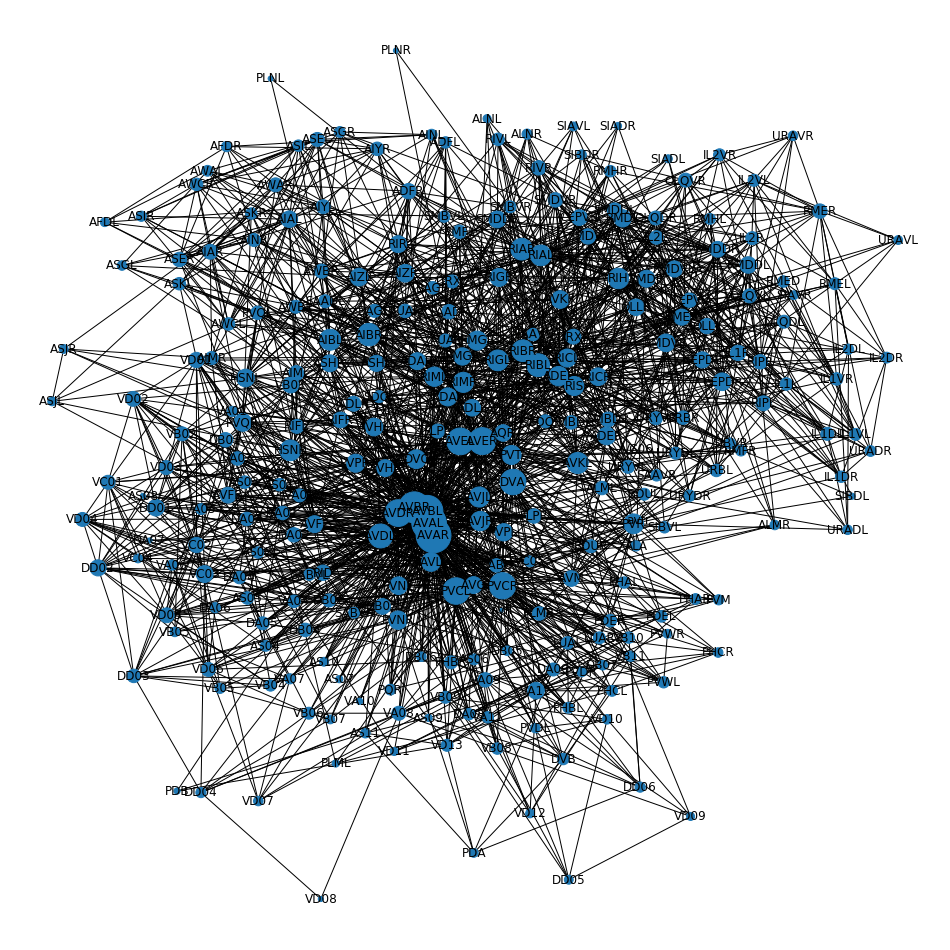

In [65]:
figsize = (13,13)
plt.figure(figsize=figsize)
plot = nx.draw_kamada_kawai(G, node_size=node_degrees*13, with_labels=True)
#nx.draw_networkx_labels()

So already, simply by computing the node degree, we are directed to sensitive targets. And in fact the four top nodes, AVAR, AVAL, AVBR, AVBL, were already experimentally known to single-handedly cause motor dysfunction through laser ablation. So were the neurons AVDR, PVCR, PVCL, AVDL which are ranked at 7th, 8th, 9th and 11th in the node degree hierarchy. 

Thus we know that simple, straight forward network analysis can take us surprisingly far. However, we shouldn't stop here. First of all, there are many cases of high-degree nodes which *don't* exert any significant power over motion patterns. Secondly, there exists a range of low-degree which *do* play an important role. 

What the researchers did was to take the analysis a step further. They identified another neuron with a key role in motor control, which was later confirmed experimentally. We will replicate the result here. 

### Control theory
The research is rooted in control theory: based on the structural connectivity, how can one signal control the output? Can different outputs be controlled independently? By outputs here, we mean muscle cells, the actual effectors of behaviour. Each muscle cell is innervated by motor neuron - the interface from neuron and mucle. Just from the definitions it is obvious that obliterating a motor neuron has a crucial impact on motor function. 

A basic result in control theory is that using k control units, at most k output units can be independently controllable. So for instance, if we wish to control 3 muscle cells through the bottleneck of 2 motor neurons, we can only control 2 of the muscles independently. (use figure for this). 

This becomes important as each muscle needs to be innervated by motor neurons.

Kalman's criterion a theoretical prerequisite for a system to be controlable:
rank\[CB, CAB, CA^2B,  ... ;CA^(N+M+1)B\] = M. Because of computational unfeasibility, the researchers used *structural controlability*, which is only dependent on the connectome structure, without considering its exact values (synapse weights) or the input signals.

#### Simple example

we have N=2 neurons and M=2 muscles. We name the cells (neurons and muscles combined) from 1 to 4 (which is assigned as 1, which is 2... is not important). The connectivity diagram is represented as a matrix A, below. B is the matrix of which cells receive external input (i.e. sensory input). C is the matrix over nodes we wish to control (basically just 1 for muscle cells and 0 for neurons).

In [319]:
def is_kalman(A, M, random_state=1):
    """Whether kalman condition is satisfied. 
    Non-zero weights are randomly set to avoid a Lebesque measure of zero."""
    A_rnd = A*np.random.rand(*A.shape)
    rk = np.linalg.matrix_rank(A*A_rnd)
    print(f"Rank = {rk} \t M = {M}")
    return(rk == M)

def kalman(A,B,C,M,N):
    """produces the matrix [CB, CAB, CA^2B....CA^(M+N-1)B]"""
    ll = []
    for k in range(M+N):
        ll.append(_kalman(A,B,C,k))
    return np.vstack(ll).T

def _kalman(A,B,C,k):
    """computes matrix product C A^k B"""
    if k==0: return C.dot(B)
    return _kalman(A, B, C.dot(A), k-1)

rnk = np.linalg.matrix_rank

In [330]:
M, N = 2, 2
A = np.array([[0,0,0,0],
              [1,0,0,0],
              [1,0,0,0],
              [0,0,1,0]])

B = np.array([1,0,0,0]).T

C = np.array([[0,1,0,0],
             [0,0,0,1]])

M = C.shape[0]
N = A.shape[0] - M

In [331]:
[print(m, end='\n\n') for m in [A,B,C]]

[[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]]

[1 0 0 0]

[[0 1 0 0]
 [0 0 0 1]]



[None, None, None]

In [332]:
kal = kalman(A,B,C,M,N)
print(kal)
is_kalman(kal,M)

[[0 1 0 0]
 [0 0 1 0]]
Rank = 2 	 M = 2


True

In [333]:
# another case
C = np.array([[0,1,0,0],
              [0,0,1,0]])

kal = kalman(A,B,C,M,N)
print(kal)
is_kalman(kal,M)

[[0 1 0 0]
 [0 1 0 0]]
Rank = 1 	 M = 2


False

In [334]:
A = np.array([[0,0,0],
              [1,0,1],
              [1,1,0]])
B = np.array([1,0,0]).T
C = np.array([[0,1,0],
             [0,0,1]])
M = C.shape[0]
N = A.shape[0] - M

kal = kalman(A,B,C,M,N)
print(kal)
is_kalman(kal, M)

[[0 1 1]
 [0 1 1]]
Rank = 2 	 M = 2


True

In [335]:
kal

array([[0, 1, 1],
       [0, 1, 1]])

In [336]:
R = np.array([[1,3,7],
              [2,8,3],
              [7,8,1]])
rnk(kal)

1